<a href="https://colab.research.google.com/github/octeacherathome/Ajuste-Lineal---Minimos-Cuadrados/blob/master/NoLinearAdjust_MV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ajuste Nolineal utilizando el modulo optimize de la libreria scipy**
El código que se muestra a continuacíon permite realizar ajustes no lineal utilizando la libreria de scipy, especificamente el modulo optimize, donde se hace uso del algoritmo de Levenberg–Marquardt

https://python4esac.github.io/fitting/least-squares-fitting.html

In [1]:
#Esto pemite montar la carpeta de drive en el espacio de google colab
#Se debe dar permisos para poder montar los archivos del drive
from google.colab import drive
import sys
drive.mount('/content/gdrive')
#cd path/to/your/folder
#!cd /content/gdrive/MyDrive/"Colab Notebooks"
#sys.path.append('/content/gdrive/My Drive/Colab Notebooks/')

!ls  #listamos el directorio en el que estamos ubicados


Mounted at /content/gdrive
gdrive	sample_data


In [2]:
#Especificamos la ruta de la carpeta en la cual estaran los datos
from pathlib import Path
# the path of the directory which saves your .py file
src_dir1 = Path('/content/gdrive/MyDrive/Colab Notebooks/')

# add the path to system path
import sys
try:
  sys.path.index(str(src_dir1))
except ValueError:
  sys.path.insert(0,str(src_dir1))

# print system path
sys.path

['/content/gdrive/MyDrive/Colab Notebooks',
 '/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython']

In [3]:
#Ajuste No lineal para una funcion senoidal
#Programa para realizar un ajsute lineal en python
import numpy as np
import matplotlib.pyplot as plt
import fit_leastsq as f_l #libreria para ajusta los datos
import time as tm
import random as rand

# La funcion que se desee ajustar debe ser definida en la definicion funF(valor x, parametros)

In [4]:
#Funcion para convertir string a float, devueve un lista np
def str2float(lst):
	return np.array([float(i) for i in lst])

#Funcion para contar el numero de datos por columna
#Si encuentra espacio vacio, el programa lo ignora
def size_Num(array):
	n2 = array.size
	n3 = 0

	for i in range(0,n2):
	   if array[i] != '':
	      n3 += 1
	return n3

#Definicion de funcion
"""
#Ajuste de una funcion  tipo seno o coseno
def funF(x, p0,p1,p2, p3):
	return p0*np.sin(2*np.pi*p1*x+p2)+p3
def funFF(x, p):
	return funF(x,*p)
"""

#Definicion de la funcion para ajustar
def funF(x, p2,p1,p0):
	return p2*x**2 + p1*x + p0
def funFF(x, p):
	return funF(x,*p)

In [5]:
#Se pide el nombre de archivo
print("Nombre de archivo de los datos con extension: ", end="")
#name = str(input())
name = 'DatosMP2.csv'
print("Delimitador de campo: ", end="")
#delimiter = str(input())
delimiter = ','
print("# de linea de inicio de datos: ", end="")
#sLine = int(input())
sLine = 1
print("# de ajustes lineales a realizar: ", end="")
#numAjus = int(input())
numAjus = 3

fileData = np.loadtxt(sys.path[0]+'/'+name,dtype=float, delimiter=delimiter, skiprows = sLine)

Nombre de archivo de los datos con extension: Delimitador de campo: # de linea de inicio de datos: # de ajustes lineales a realizar: 3


# El numero de parametros que se ingresan depende del tipo de funcion que se desee ajustar

In [6]:
#Si se utiliza otra funcion se debe modificar la
#1
print("Parametros de ajustes iniciales: ")
print("Coeficiente P2: ", end="")
A = float(input())
print("Coeficiente P1: ", end="")
B = float(input())
print("Coeficiente P0: ", end="")
C = float(input())

#Lista inicial de los parametros del ajuste
p_start = [A,B,C]

Parametros de ajustes iniciales: 
Coeficiente P2: 1
Coeficiente P1: 1
Coeficiente P0: 1


# Se realiza el ajuste respectivo de los datos

Asjute Nolineal #:  0

# Fit parameters and parameter errors from lestsq method :
pfit =  [ 1.00000000e+00 -5.31807482e-14  2.90001574e-14]
perr =  [8.35459813e-16 3.06365815e-15 3.54468644e-15]
Chi_2 =  2.900015743071606e-14
Asjute Nolineal #:  2

# Fit parameters and parameter errors from lestsq method :
pfit =  [ 1.25000000e+00 -5.52636780e-14  3.07226186e-14]
perr =  [7.12239302e-16 2.62345638e-15 4.75327747e-15]
Chi_2 =  3.072261859385379e-14
Asjute Nolineal #:  4

# Fit parameters and parameter errors from lestsq method :
pfit =  [ 1.50000000e+00 -5.98977579e-14  3.37341333e-14]
perr =  [5.63928536e-16 1.83698953e-15 5.10948540e-15]
Chi_2 =  3.3734133282989195e-14


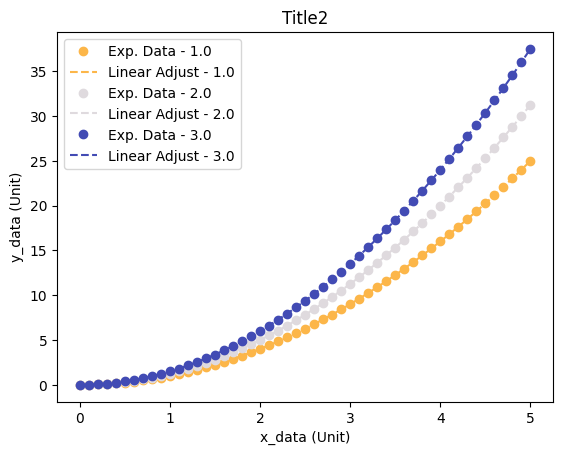

<Figure size 640x480 with 0 Axes>

In [9]:
#Grafica de la funcion con los parametros de ajuste iniciales y
#con la funcion con los parametros ajustados
plt.figure()
rand.seed(tm.time())

#Se realiza un ciclo por cada conjunto de datos
for i in range(0,2*numAjus-1,2):

  #Se genera un conjunto de valores de x
  #x_exp = (x_exp - x_exp[0])
  n = size_Num(fileData[:,i])
  x_exp = str2float(fileData[:n,i])
  y_exp = str2float(fileData[:n,i+1])

  x_teo = np.linspace(x_exp[0],x_exp[n-1],n*5)

  ##########Ajuste NoLineal de los datos##########
  pfit_ls, perr_ls = f_l.fit_leastsq(p_start, x_exp, y_exp, funFF)
  chi_sq = sum((funFF(x_exp, pfit_ls) - y_exp)**2/funFF(x_exp, pfit_ls))
  print("Asjute Nolineal #: ", i)
  print("\n# Fit parameters and parameter errors from lestsq method :")
  print("pfit = ", pfit_ls)
  print("perr = ", perr_ls)
  print("Chi_2 = ", chi_sq)
  ##########Ajuste NoLineal de los datos##########

  #print("Datos en x: %f", x_exp)
	#print("Datos en y: %f", y_exp)
  r = rand.random()
  b = rand.random()
  g = rand.random()
  color = (r, g, b)

  label1 = "Exp. Data - " #Modificar esta linea si se desea cambiar la desc. legenda
  label2 = "Linear Adjust - " #Modificar esta linea si se desea cambiar la desc. legenda

  #Grafica de la funcion con los parametros de ajustados
  plt.plot(x_exp,y_exp, "o", label=label1 + str(i/2+1), color = color)
  plt.plot(x_teo,funFF(x_teo, pfit_ls), "--", label=label2+str(i/2 + 1), color = color)

  ##Ajuste Nolineal##
plt.xlabel("x_data (Unit)")
plt.ylabel("y_data (Unit)")
plt.title("Title2")
plt.legend()
plt.show()
plt.savefig(sys.path[0]+'/'+"noLinearAdjust.png")